# Predicting votes of US Congressmen based on their political party and on other votes they have made in the past

Pulled data from: https://archive.ics.uci.edu/

The data contains a total of 435 examples, one for each member of the US House of Representatives. Each example is described in terms of 17 attributes
including ”party” (democrat or republican), and 16 votes made by this congressperson, such as ”antiSatelliteTestBan” (with values ”y”, ”n” and ”?”).

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("house-votes-84.data")
print("Data shape: ", df.shape)
df.columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 
              'physician-fee-freeze','el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
              'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue',
              'crime', 'duty-free-exports', 'export-administration-act-south-africa']

df = df.replace("?","u")
df.head(5)


Data shape:  (434, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,u
1,democrat,u,y,y,u,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,u,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,u,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [3]:
pipeline = Pipeline(steps=[('one_hot_encoder', OneHotEncoder(sparse=False)),
                           ('random_forest', RandomForestClassifier(n_estimators= 1001, random_state=37))])
pipeline.steps

[('one_hot_encoder',
  OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=False)),
 ('random_forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=1001,
                         n_jobs=None, oob_score=False, random_state=37, verbose=0,
                         warm_start=False))]

In [4]:
train, test = train_test_split(df, test_size=0.33, random_state=37)

train_X = train.iloc[:,1:]
train_y = train['party']

test_X = test.iloc[:,1:]
test_y = test['party']

print("Train_X shape: ", train_X.shape)
print("Train_y shape: ", train_y.shape)
print("Test_X shape: ", test_X.shape)
print("Test_y shape: ", test_y.shape)
train_X.head(5)

Train_X shape:  (290, 16)
Train_y shape:  (290,)
Test_X shape:  (144, 16)
Test_y shape:  (144,)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
80,y,n,y,n,n,n,y,y,u,y,y,y,n,y,n,y
240,y,n,y,n,n,n,y,y,y,y,y,n,n,y,y,y
154,y,y,n,y,y,y,n,u,n,n,y,y,y,y,n,n
377,n,n,n,y,y,y,n,n,n,n,n,y,y,y,n,y
55,n,y,n,y,y,y,n,n,n,y,y,y,y,y,n,y


In [5]:
model = pipeline.fit(train_X, train_y)

In [6]:
predicted = model.predict(test_X)
print(metrics.classification_report(test_y, predicted))
print(metrics.confusion_matrix(test_y, predicted))

              precision    recall  f1-score   support

    democrat       0.99      0.94      0.97        89
  republican       0.92      0.98      0.95        55

    accuracy                           0.96       144
   macro avg       0.95      0.96      0.96       144
weighted avg       0.96      0.96      0.96       144

[[84  5]
 [ 1 54]]


In [7]:
y_bin = pd.get_dummies(test_y).iloc[:,0]
p_bin = pd.get_dummies(predicted).iloc[:,0]
fpr, tpr, threshold = roc_curve(y_bin, p_bin)

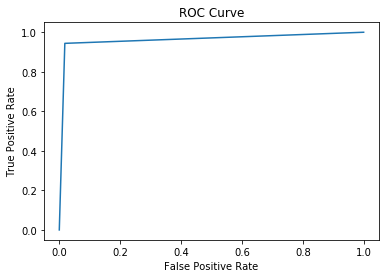

In [8]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [9]:
train, test = train_test_split(df, test_size=0.33, random_state=37)


train_y = train['religious-groups-in-schools']
train_X = train.drop('religious-groups-in-schools', axis=1)


test_y = test['religious-groups-in-schools']
test_X = test.drop('religious-groups-in-schools', axis=1)

print("Train_X shape: ", train_X.shape)
print("Train_y shape: ", train_y.shape)
print("Test_X shape: ", test_X.shape)
print("Test_y shape: ", test_y.shape)

Train_X shape:  (290, 16)
Train_y shape:  (290,)
Test_X shape:  (144, 16)
Test_y shape:  (144,)


In [10]:
model = pipeline.fit(train_X, train_y)

In [11]:
predicted = model.predict(test_X)
print(metrics.classification_report(test_y, predicted))
print(metrics.confusion_matrix(test_y, predicted))

              precision    recall  f1-score   support

           n       0.66      0.81      0.73        48
           u       1.00      0.50      0.67         2
           y       0.89      0.80      0.84        94

    accuracy                           0.80       144
   macro avg       0.85      0.70      0.75       144
weighted avg       0.82      0.80      0.80       144

[[39  0  9]
 [ 1  1  0]
 [19  0 75]]


In [12]:
y_bin = pd.get_dummies(test_y).iloc[:,1]
p_bin = pd.get_dummies(predicted).iloc[:,1]
fpr, tpr, threshold = roc_curve(y_bin, p_bin)


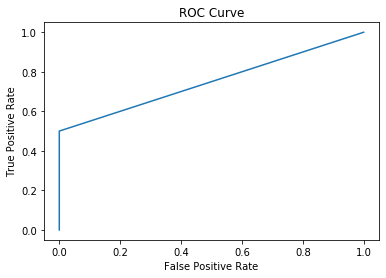

In [13]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Comparing the two models, it is clearly easier to predict an individual's party than how they will vote on a particular issues. Part of this is the nature of the two variables - only a binary set of options for the party, but a third option of "unknown" appearing for the individual topic. An acceptable conjecture as to why the models perform so differently seems to be that perhaps party members as a whole, over a range of topics, vote very similarly, but in the minutia of any single issue, are more distinct from one another and thus granularly more difficult to predict without further context. Other attributes which could be valuable is the region they represent, some demographic information about their constituents, as well as the number of years they have served in public office. With additional data points like these, I believe the model could improve in the predictive power of modeling a given politicians decision regarding specific legislation or fields of interest.